<a href="https://colab.research.google.com/github/marcusvinicius2603/exercicios-machine-learning/blob/main/Atividade_02_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Passo 1 - Carregar a base de dados

In [ ]:
df =  pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Descrição das colunas

- Sex: sexo do passageiro...
- SibSp: número de iirmãos a bordo..

## Passo 2 e 3 - Explorar a base de dados e remover colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Cabin'].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [ ]:
# Remover algumas colunas deste dataframe
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket']  , axis=1, inplace=True)

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


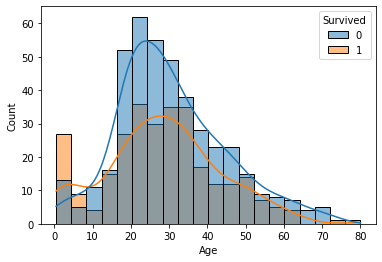

In [ ]:
sns.histplot(data=df, x="Age", kde=True, hue="Survived")

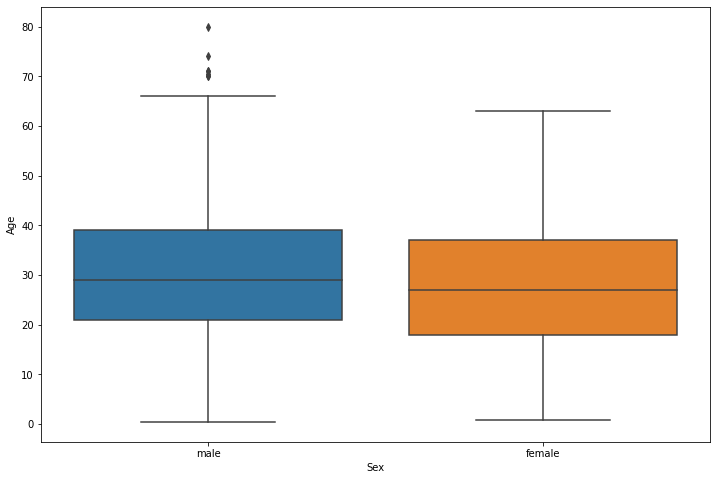

In [ ]:
plt.figure(figsize=(12,8)) #define o tamanho da figura
sns.boxplot(x='Sex', y='Age', data=df)

## Passo 4 - Trator valores nulos

Trate valores nulos por coluna - Ex.: Como preencher os valores nulos da coluna 'Age', baseado em 'Pclass' e 'Sex'?

In [ ]:
sum(df.Age.isna())

177

In [ ]:
# Substituição para a primeira classe
df.loc[df.Age.isna() & (df.Pclass == 1), 'Age'] = df[df['Pclass'] == 1].Age.median()

In [ ]:
# Subst. para segunda classe
df.loc[df.Age.isna() & (df.Pclass == 2), 'Age'] = df[df['Pclass'] == 2].Age.median()
# Subst. para terceira classe
df.loc[df.Age.isna() & (df.Pclass == 3), 'Age'] = df[df['Pclass'] == 3].Age.median()

In [ ]:
sum(df.Age.isna())

0

## Passo 5 - Remover linhas que ainda contém valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## Passo 6 - Substituir colunas literais por valores númericos

Usando label encoder

In [ ]:
# 'Sex' , 'Embarked'

In [ ]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

In [ ]:
titanic = df

In [ ]:
titanic['Sex'] = le1.fit_transform(df['Sex'])

In [ ]:
titanic['Embarked'] = le2.fit_transform(df['Embarked'])

In [ ]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### One Hot Encoding

In [ ]:
# não vai funcionar pq df já não tem as colunas com categorias!!!!!!!!
sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

## Passo 7 - se aplica para one hot encoding  [usando label encoder não tem]

In [ ]:
# não se aplica se usamos label encoder!!!!!!!!!! 
# é usado para one hot encoding

## Passo 8 - Dividir a base dados em treinamento e teste

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
y = titanic['Survived']

In [ ]:
X = titanic.drop('Survived', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Passo 9 - Normalização dos dados

In [ ]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
5,3,1,24.0,0,0,8.4583,1
6,1,1,54.0,0,0,51.8625,2
7,3,1,2.0,3,1,21.0750,2
8,3,0,27.0,0,2,11.1333,2
9,2,0,14.0,1,0,30.0708,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
scaler.fit(X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

StandardScaler()

In [ ]:
X_train_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

In [ ]:
X_test_scaled[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(X_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])